# Importy

In [2]:
import pandas as pd

# Data
from Data.DataLoader import *
from Data.DataCleaner import *

# MarkowitzAnalysis
from MarkowitzAnalysis.ReturnAnalysis import *

# PortfolioAnalysis
from PortfolioAnalysis.PortfolioPerformance import *
from PortfolioAnalysis.PortfolioLoader import *

# PositionAnalysis
from PositionAnalysis.PositionManipulations import *

# Plotting
from Plotting.Plotter import *
from Plotting.EfficientFrontierPlot import *

# Backtest
from Backtest.Backtest import *

from warnings import filterwarnings
filterwarnings('ignore')

# Działanie właściwego programu

## Scenariusz 0. Aktualizacja danych do obecnej daty

#### Właściwy kod

In [2]:
start, end = '2025-02-20', '2025-04-01'

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

dataloader = DataLoader()
data = dataloader.loadInstrumentsData(start, end, verbose=True)

[INFO] Rozpoczynam pracę programu: 2025-04-01 18:41:48
	Pobieramy brakujące dane od 2025-03-28 do 2025-04-01...


	Stan pobierania:   0%|          | 0/1317 [00:00<?, ?it/s]

	Pobieram CHFPLN
	Pobieram GBPPLN
	Pobieram USDPLN
	Pobieram EURPLN
Zakończono pobieranie
	Zagubiliśmy 0 instrumentów.


## Scenariusz 1. Analiza obecnej pozycji

In [3]:
info = DataLoader().loadInstrumentsInfo()
pm = PositionManipulator(info = info, 
                         filename_load = 'pos3', 
                         filepath_load = 'Positions')
pm.AnalyzePosition().getSummary()

,Okres zawarcia pozycji,Czas otwarcia pozycji,Obecny czas,Czas od otwarcia,Przewidywana data zamknięcia pozycji
,7 dni,2025-03-21 21:01:23,2025-04-01 19:22:56,10 dni 22 godzin,2025-03-28


,Początkowy kurs walutowy (Ask),Obecny kurs walutowy (Bid),Stopa zwrotu [%]
EURPLN,4.2244,4.1613,-1.4944
USDPLN,3.9067,3.8541,-1.3457
GBPPLN,5.0559,4.9816,-1.4689
CHFPLN,4.4399,4.3613,-1.7704


,Zmiana dzienna [%],Zmiana tygodniowa [%],Zmiana miesięczna [%],Zmiana roczna [%]
IUES.L,0.8192,0.7128,4.6965,0.7128
WELD.DE,0.4875,2.7511,3.0488,2.7511
ESIE.DE,0.2174,0.6367,4.2569,0.6367
STN.PA,0.9174,1.3088,3.7212,1.3088
SPYN.DE,0.7731,1.1397,3.6697,1.1397
GRE.PA,-1.0631,-0.8182,5.3799,-0.8182
WELN.DE,1.2300,-0.3318,0.2823,-0.3318


,Waluta bazowa,Waga w portfelu [%],Wartość początkowa [PLN],Kurs początkowy,Kurs obecny,Stopa zwrotu [%],Kurs początkowy [PLN],Kurs obecny [PLN],"Stopa zwrotu [PLN, %]"
IUES.L,USD,8.640,86.40,9.3912,9.5375,1.5573,36.6888,36.7585,0.1899
WELD.DE,EUR,14.752,147.52,10.8720,11.1300,2.3731,45.9277,46.3153,0.8439
ESIE.DE,EUR,14.303,143.03,10.9520,11.0640,1.0226,46.2656,46.0406,-0.4863
STN.PA,EUR,11.381,113.81,206.1500,209.0000,1.3825,870.8600,869.7117,-0.1319
SPYN.DE,EUR,12.758,127.58,205.6500,208.5500,1.4102,868.7479,867.8391,-0.1046
GRE.PA,EUR,25.569,255.69,1.8426,1.8426,0.0000,7.7839,7.6676,-1.4937
WELN.DE,EUR,12.430,124.30,11.8820,12.0160,1.1278,50.1943,50.0022,-0.3828


,Zwrot z portfela [%],"Zwrot z portfela [PLN, %]","Oczekiwany zwrot z portfela [PLN, %]","Przedział ufności (0.95) zwrotu portfela [PLN, %]",Zwrot nominalny [PLN]
,1.1083,-0.3865,1.7984,"[1.2755, 2.2663]",-3.8652


## Scenariusz 2. Wybór nowej pozycji

In [23]:
freq = '2M'

start, end = generate_start_end(shift_date(now(), 0), freq=freq, len_train=4)

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")
print(f"[INFO] Pracujemy na danych z okresu od {start} do {end}")

dataloader = DataLoader()
data = dataloader.loadInstrumentsData(start_date=start, 
                                      end_date=end, 
                                      filename='InstrumentsData')
info = dataloader.loadInstrumentsInfo()

returnRates = DataCleaner(data, info, verbose=False).getReturnRates(freq)

# 'pp' jest klasy PortfolioPerformance
pp = MarkowitzOptimization(returnRates, freq).getOptimalWeights(model='max_sharpe', risk_method='oas')

# Możemy zapoznać się ze statystykami zaproponowanej pozycji
print()
pp.getSummary()

[INFO] Rozpoczynam pracę programu: 2025-04-01 19:02:40
[INFO] Pracujemy na danych z okresu od 2024-07-31 do 2025-04-01
[INFO] Załadowano 841 instrumentów.

Czas przeprowadzenia analizy: 2025-04-01 19:02:57.
Opisywany obiekt: Wstępna analiza.

Zastosowane kryterium wyboru: max_sharpe.
Metoda estymacji ryzyka: oas.
Poziom ufności: 0.95.

Okres inwestycji: 2M.
Oczekiwany zwrot z portfela [%]: 1.2213
Oczekiwane ryzyko portfela [%]: 0.8553
	Przedział ufności dla stóp zwrotu [%]: [-0.3623, 2.3695]
Sharpe Ratio portfela: 0.2541

Skład portfela:
	MWOX.DE:
		Waga w portfelu [%]: 1.126
		Oczekiwana stopa zwrotu [%]: 4.5122
		Oczekiwana stopa ryzyka [%]: 4.9881
		Przedział ufności dla stóp zwrotu [%]: [-3.9085, 11.1672]
	BNK.PA:
		Waga w portfelu [%]: 1.299
		Oczekiwana stopa zwrotu [%]: 7.4215
		Oczekiwana stopa ryzyka [%]: 6.4151
		Przedział ufności dla stóp zwrotu [%]: [-0.7359, 18.6465]
	LBNK.DE:
		Waga w portfelu [%]: 1.302
		Oczekiwana stopa zwrotu [%]: 7.4473
		Oczekiwana stopa ryzyka [%]:

#### Scenariusz 2a. Statystyki nas zainteresowały i chcemy zapisać rekomendację na później.

In [24]:
pp.getSummary(verbose=False, save_dict=True, filename='rec', filepath='Recommendations')

[INFO] Zmieniam 'Rodzaj' z 'Wstępna analiza' na 'Rekomendacja' i zapisuję.


#### Scenariusz 2b. Chcemy przekalkulować skład portfela na PLN z zapisanej wcześniej rekomendacji.

In [ ]:
K = 1000 # kwota do wpłacenia

pm = PositionManipulator(info = info, 
                         filename_load = 'pos1', 
                         filepath_load = 'Recommendations')
pm.Recalculate(K)

Skład portfela przeliczony dla kwoty 1000 PLN:
	ESIS.DE: 72.53 PLN
	SPYC.DE: 91.15 PLN
	GRE.PA: 346.11 PLN
	ASI.PA: 49.53 PLN
	DXSK.DE: 52.25 PLN
	S7XE.DE: 146.94 PLN
	BXX.PA: 84.51 PLN
	LYBK.DE: 86.57 PLN
	BNKE.PA: 70.42 PLN


#### Scenariusz 2c. Chcemy otwierać pozycję zapisaną w rekomendacji.
W rzeczywistości najpierw wykonujemy rekalkulację dla konkretnej kwoty (Scenariusz 2b), otwieramy pozycję w aplikacji XTB i dopiero uruchamiamy poniższy kod.

In [25]:
K = 1000 # kwota do wpłacenia
filename_load = 'rec' # nazwa pliku z rekomendacją
position_start = ... # data dzienna otwarcia pozycji
position_end = ... # data dzienna zamknięcia pozycji (patrzymy na 'freq')

info = DataLoader().loadInstrumentsInfo()
pm = PositionManipulator(info = info, 
                         filename_load = filename_load, 
                         filepath_load = 'Recommendations')

pm.OpenPosition(K = 1000., filename_save='pos9')
# pm.OpenPosition(filename_save=f'Pozycja od {position_start} do {position_end}')

#### Scenariusz 2d. Co kryje w sobie słownik z zapisem pozycji?

In [7]:
statDict = LoadDict('pos1', 'Positions')
statDict

{'OczekiwanyZwrotPortfela': 1.9237,
 'OczekiwaneRyzykoPortfela': 0.689,
 'PrzedziałUfnościZwrotuPortfela': {'lowCI': 1.3061, 'highCI': 2.4231},
 'SharpeRatio': 2.4607,
 'SkładPortfela': {'LIRU.DE': 5.231,
  'DTLE.L': 10.505,
  'SPYC.DE': 5.259,
  'ESIS.DE': 2.861,
  'GRE.PA': 25.673,
  'BTEC.L': 5.272,
  'S7XE.DE': 26.301,
  'ICHN.AS': 2.89,
  'X7PS.L': 2.119,
  'BXX.PA': 12.221},
 'OczekiwaneZwroty': {'LIRU.DE': 1.9736,
  'DTLE.L': 0.8083,
  'SPYC.DE': 1.3566,
  'ESIS.DE': 1.1341,
  'GRE.PA': 1.2729,
  'BTEC.L': 1.117,
  'S7XE.DE': 4.4424,
  'ICHN.AS': -0.3793,
  'X7PS.L': 3.1997,
  'BXX.PA': 0.171},
 'OczekiwaneRyzyka': {'LIRU.DE': 1.6104,
  'DTLE.L': 2.0457,
  'SPYC.DE': 2.1638,
  'ESIS.DE': 2.1777,
  'GRE.PA': 2.228,
  'BTEC.L': 1.7091,
  'S7XE.DE': 2.5053,
  'ICHN.AS': 2.8397,
  'X7PS.L': 2.7432,
  'BXX.PA': 3.2584},
 'PrzedziałyUfnościZwrotów': {'LIRU.DE': {'lowCI': 0.7355, 'highCI': 3.1938},
  'DTLE.L': {'lowCI': -1.8109, 'highCI': 3.0903},
  'SPYC.DE': {'lowCI': -1.5073, 'highC

#### Scenariusz 2e. Zamknięcie pozycji

In [3]:
info = DataLoader().loadInstrumentsInfo()
pm = PositionManipulator(info = info, 
                         filename_load = 'pos3', 
                         filepath_load = 'Positions')
pm.ClosePosition()

#### Scenariusz 2f. Wspominamy zamknięte pozycje

In [4]:
LoadDict('pos1', 'Closed positions')

{'OczekiwanyZwrotPortfela': 1.9237,
 'OczekiwaneRyzykoPortfela': 0.689,
 'PrzedziałUfnościZwrotuPortfela': {'lowCI': 1.3061, 'highCI': 2.4231},
 'SharpeRatio': 2.4607,
 'SkładPortfela': {'LIRU.DE': 5.231,
  'DTLE.L': 10.505,
  'SPYC.DE': 5.259,
  'ESIS.DE': 2.861,
  'GRE.PA': 25.673,
  'BTEC.L': 5.272,
  'S7XE.DE': 26.301,
  'ICHN.AS': 2.89,
  'X7PS.L': 2.119,
  'BXX.PA': 12.221},
 'OczekiwaneZwroty': {'LIRU.DE': 1.9736,
  'DTLE.L': 0.8083,
  'SPYC.DE': 1.3566,
  'ESIS.DE': 1.1341,
  'GRE.PA': 1.2729,
  'BTEC.L': 1.117,
  'S7XE.DE': 4.4424,
  'ICHN.AS': -0.3793,
  'X7PS.L': 3.1997,
  'BXX.PA': 0.171},
 'OczekiwaneRyzyka': {'LIRU.DE': 1.6104,
  'DTLE.L': 2.0457,
  'SPYC.DE': 2.1638,
  'ESIS.DE': 2.1777,
  'GRE.PA': 2.228,
  'BTEC.L': 1.7091,
  'S7XE.DE': 2.5053,
  'ICHN.AS': 2.8397,
  'X7PS.L': 2.7432,
  'BXX.PA': 3.2584},
 'PrzedziałyUfnościZwrotów': {'LIRU.DE': {'lowCI': 0.7355, 'highCI': 3.1938},
  'DTLE.L': {'lowCI': -1.8109, 'highCI': 3.0903},
  'SPYC.DE': {'lowCI': -1.5073, 'highC

In [3]:
print(summary_from_dict(LoadDict('pos1', 'Closed positions')))

Czas przeprowadzenia analizy: 2025-03-17 19:13:45.
Opisywany obiekt: Zamknięta pozycja.
Czas otwarcia pozycji: 2025-03-17 19:14:08.
Czas zamknięcia pozycji: 2025-04-01 20:03:12.

Zastosowane kryterium wyboru: max_sharpe.
Metoda estymacji ryzyka: oas.
Poziom ufności: 0.95.

Okres inwestycji: 2w.
Oczekiwany zwrot z portfela [%]: 1.9237
Oczekiwane ryzyko portfela [%]: 0.689
	Przedział ufności dla stóp zwrotu [%]: [1.3061, 2.4231]
Sharpe Ratio portfela: 2.4607

Skład portfela:
	LIRU.DE:
		Waga w portfelu [%]: 5.231
		Oczekiwana stopa zwrotu [%]: 1.9736
		Oczekiwana stopa ryzyka [%]: 1.6104
		Przedział ufności dla stóp zwrotu [%]: [0.7355, 3.1938]
	DTLE.L:
		Waga w portfelu [%]: 10.505
		Oczekiwana stopa zwrotu [%]: 0.8083
		Oczekiwana stopa ryzyka [%]: 2.0457
		Przedział ufności dla stóp zwrotu [%]: [-1.8109, 3.0903]
	SPYC.DE:
		Waga w portfelu [%]: 5.259
		Oczekiwana stopa zwrotu [%]: 1.3566
		Oczekiwana stopa ryzyka [%]: 2.1638
		Przedział ufności dla stóp zwrotu [%]: [-1.5073, 3.5857]
	

## Scenariusz 3. Analiza konkretnego portfela

#### Wariant 1. Podajemy dane ręcznie

Tutaj dobrze widać, że analiza pozycji odbywa się tak naprawdę tylko po podaniu składu portfela i zaciągnięciu danych.

In [ ]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

portfolio = {'P500.DE': 32.56, 
             '4GLD.DE': 17.47, 
             'FLXI.DE': 45.06, 
             'ESD.FR': 4.91}

start, end = '2023-07-01', '2024-12-10'
freq = '3M'

dataloader = DataLoader()
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, load_only=list(portfolio.keys()))
data = datacleaner.getBidPrice()
returnRates = datacleaner.getReturnRates(freq)
pp = PortfolioPerformance(portfolio, returnRates, freq, 'empirical', 'max_utility', data=data)
pp.getSummary()

[INFO] Rozpoczynam pracę programu: 2025-02-28 15:36:55
Opis wygenerowany 2025-02-28 15:36:58.
Okres inwestycji: 3M.
Zastosowane kryterium wyboru: max_utility.
Metoda estymacji ryzyka: empirical.
Poziom ufności: 0.95.
Oczekiwany zwrot z portfela [%]: 4.4147
Oczekiwane ryzyko portfela [%]: 3.5625
Przedział ufności dla stóp zwrotu [%]: [-1.5849, 9.6473]
Sharpe Ratio portfela: 0.8165
Skład portfela:
	P500.DE:
		Waga w portfelu [%]: 32.56
		Oczekiwana stopa zwrotu [%]: 4.4824
		Oczekiwana stopa ryzyka [%]: 5.2004
		Przedział ufności dla stóp zwrotu [%]: [-3.4643, 13.0589]
	4GLD.DE:
		Waga w portfelu [%]: 17.47
		Oczekiwana stopa zwrotu [%]: 5.3295
		Oczekiwana stopa ryzyka [%]: 5.9765
		Przedział ufności dla stóp zwrotu [%]: [-3.49, 15.3959]
	FLXI.DE:
		Waga w portfelu [%]: 45.06
		Oczekiwana stopa zwrotu [%]: 4.071
		Oczekiwana stopa ryzyka [%]: 4.5783
		Przedział ufności dla stóp zwrotu [%]: [-1.9526, 12.2865]
	ESD.FR:
		Waga w portfelu [%]: 4.91
		Oczekiwana stopa zwrotu [%]: 3.865
		Ocz

##### Wariant 1a. Chcemy zapisać statystyki portfela na później.

In [ ]:
SaveDict(pp.getStatDict(), 'Pozycja od 10.12.2024 do 10.03.2025', 'Positions')

#### Wariant 2. Ładujemy zapisany wcześniej portfel/pozycję/rekomendację.

In [2]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}\n")

pl = PortfolioLoader(filename='pos1',
                     filepath='Positions')
pl.getSummary()

[INFO] Rozpoczynam pracę programu: 2025-03-25 21:42:39

Czas przeprowadzenia analizy: 2025-03-25 21:42:42.
Opisywany obiekt: Wstępna analiza.

Zastosowane kryterium wyboru: max_sharpe.
Metoda estymacji ryzyka: oas.
Poziom ufności: 0.95.

Okres inwestycji: 2w.
Oczekiwany zwrot z portfela [%]: 1.8748
Oczekiwane ryzyko portfela [%]: 0.8896
	Przedział ufności dla stóp zwrotu [%]: [0.9108, 2.9898]
Sharpe Ratio portfela: 1.851

Skład portfela:
	LIRU.DE:
		Waga w portfelu [%]: 5.231
		Oczekiwana stopa zwrotu [%]: 1.9689
		Oczekiwana stopa ryzyka [%]: 1.6314
		Przedział ufności dla stóp zwrotu [%]: [0.7359, 3.3794]
	DTLE.L:
		Waga w portfelu [%]: 10.505
		Oczekiwana stopa zwrotu [%]: -0.731
		Oczekiwana stopa ryzyka [%]: 2.0744
		Przedział ufności dla stóp zwrotu [%]: [-2.9559, 1.7229]
	SPYC.DE:
		Waga w portfelu [%]: 5.259
		Oczekiwana stopa zwrotu [%]: -0.6304
		Oczekiwana stopa ryzyka [%]: 2.5826
		Przedział ufności dla stóp zwrotu [%]: [-3.5241, 3.6734]
	ESIS.DE:
		Waga w portfelu [%]: 2.8

##### Wariant 2a. Poddajemy ten portfel/pozycję/rekomendację dalszej analizie

In [ ]:
dataloader = DataLoader()
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, load_only=pl.symbols)
data = datacleaner.getBidPrice()
returnRates = datacleaner.getReturnRates(pl.freq)

pp = pl.getPortfolio(returnRates, data)
# z obiektu 'pp' można teraz odzyskać historyczny kurs portfela, stopy zwrotu, ryzyko itp.

## Scenariusz 4. Wykresy dla konkretnego portfela

[INFO] Rozpoczynam pracę programu: 2025-03-25 21:45:09

[INFO] Wygładzamy dane, obliczamy zmienność...
[INFO] Rysujemy wykresy...


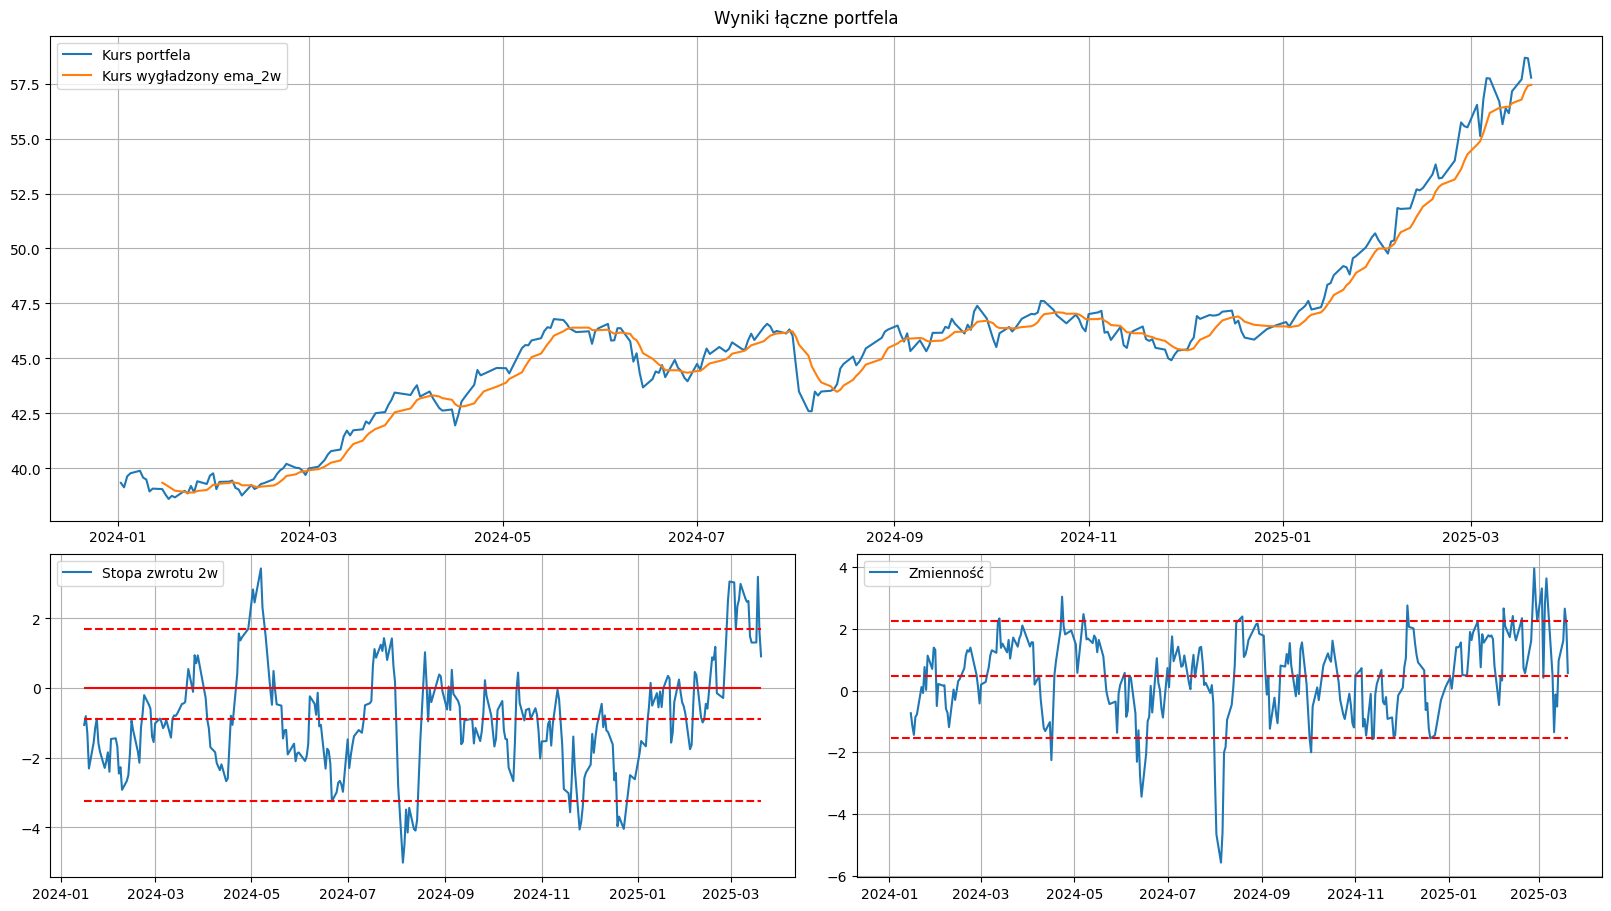

In [4]:
print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

pl = PortfolioLoader('pos1', 'Positions')
freq = pl.freq # można to pobrać z obiektu 'pl' jako 'pl.freq', ale można też ustawić na inną wartość

# print()
# pl.getSummary()

print()
start, end = '2024-01-01', '2025-03-20'
dataloader = DataLoader()
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info, load_only=pl.symbols)
data = datacleaner.getBidPrice()
returnRates = datacleaner.getReturnRates(freq)

plotter = Plotter(pl.portfolio,
                  data,
                  returnRates,
                  freq,
                  pl.model,
                  pl.risk_method,
                  compare='ema_2w')
plotter.plot(show_instruments=False)

## Scenariusz 5. Wykres "Efficient Frontier"

In [ ]:
start, end = '2024-01-01', '2025-02-03'

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")

dataloader = DataLoader()
data = dataloader.loadInstrumentsData(start, end)
info = dataloader.loadInstrumentsInfo()

datacleaner = DataCleaner(data, info)

[INFO] Rozpoczynam pracę programu: 2025-02-04 18:02:51
[INFO] Usuwanie instrumentów o wysokich kosztach obsługi.
	Aktualizacja danych...
	Pozostawiam 953 instrumentów.
[INFO] Usuwanie instrumentów o wysokich spreadach.
	Aktualizacja danych...
	Pozostawiam 953 instrumentów.
[INFO] Usuwanie instrumentów o dużych brakach w danych.
	Aktualizacja danych...
	Pozostawiam 908 instrumentów.
[INFO] Usuwanie instrumentów na podstawie ich zmienności.
	Aktualizacja danych...
	Pozostawiam 839 instrumentów.


In [ ]:
freq = '3M'
returnRates = datacleaner.getReturnRates(freq)
ef = EfficientFrontierPlot(returnRates, freq, Npoints=80)

[INFO] Przygotowuję dane do wykresu...
	Pozostało 100.0%
	Pozostało 87.5%
	Pozostało 75.0%
	Pozostało 62.5%
	Pozostało 50.0%
	Pozostało 37.5%
	Pozostało 25.0%
	Pozostało 12.5%
[INFO] Wyznaczamy portfel 'max_sharpe'...
[INFO] Wyznaczamy portfele 'max_utility'...


[INFO] Generuję 5000 portfeli losowych...
	Pozostało 100.0%
	Pozostało 90.0%
	Pozostało 80.0%
	Pozostało 70.0%
	Pozostało 60.0%
	Pozostało 50.0%
	Pozostało 40.0%
	Pozostało 30.0%
	Pozostało 20.0%
	Pozostało 10.0%
[INFO] Rysuję wykres...


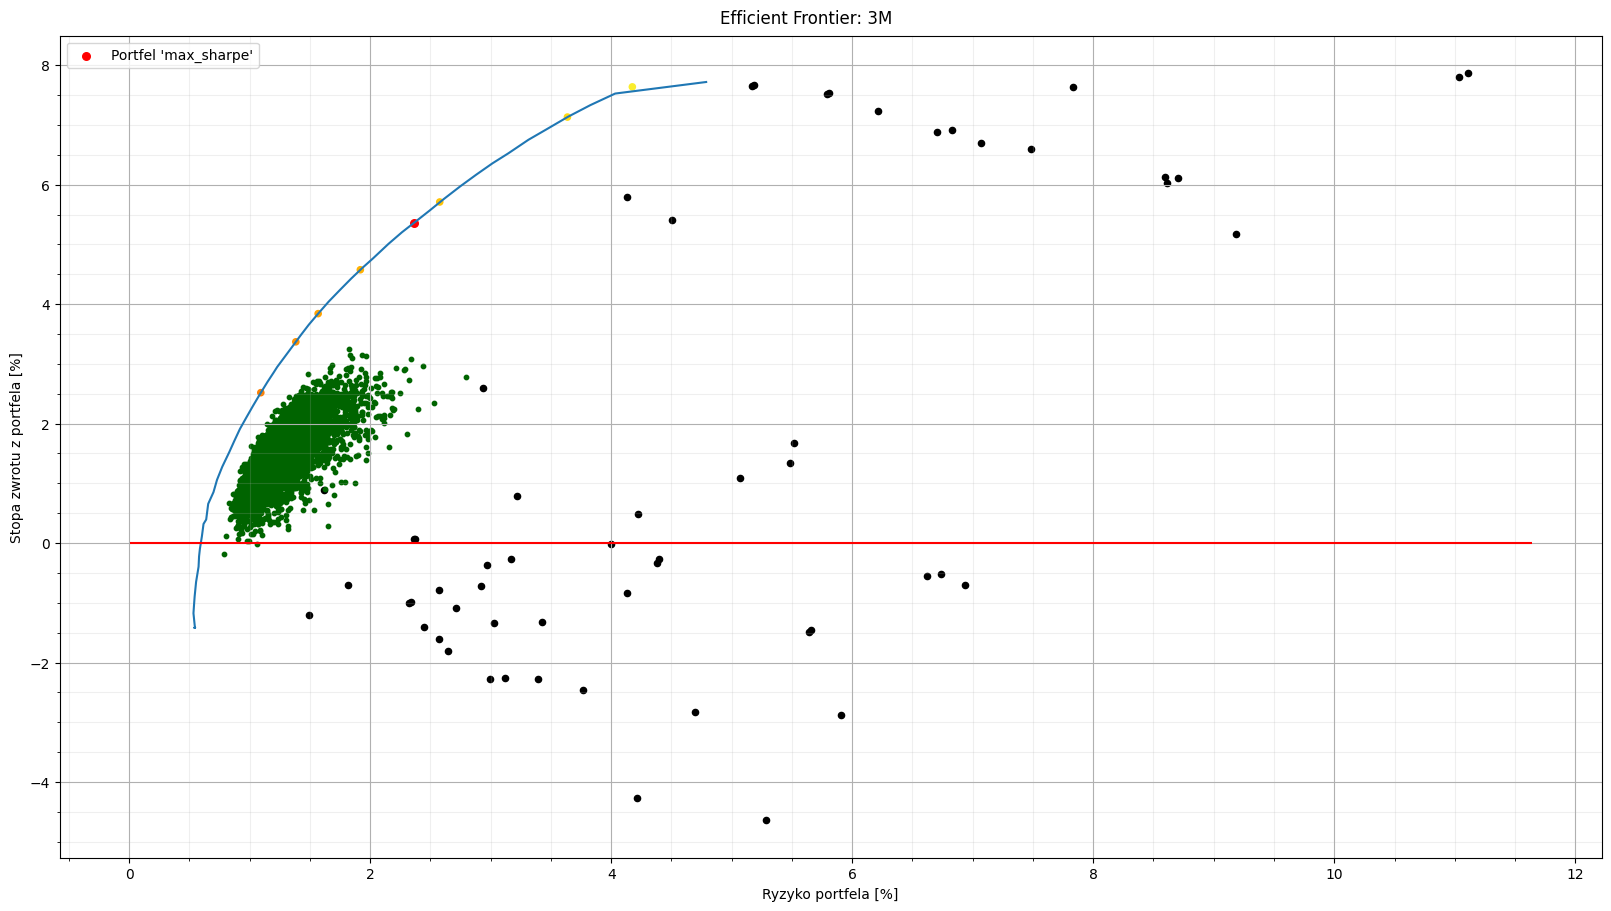

In [ ]:
ef.plot(Nrandom=5000)

## Scenariusz 6: Backtest modelu

In [ ]:
start, end = '2016-07-01', '2025-03-01'

freqs = ['1w', '2w', '3w', '1M', '6w', '2M', '3M', '4M', '5M', '6M', '8M', '1Y']
len_trains = [1, 2, 3, 4, 5, 6, 7]

beginning_time = time.time()
for i, freq in enumerate(freqs):
    
    if i > 0:
        estimate_time_to_end(i, len(freqs), beginning_time)
            
    for len_train in len_trains:
        
        print(f"[INFO] Backtest z freq = {freq}, len_train = {len_train}")
        
        bt = Backtest(start, end, freq, len_train)
        bt.runTrainTest()

        BacktestSummary = bt.summary
        SaveData(BacktestSummary, f'Backtest freq {freq} len_train {len_train}', 'Backtest')
        print()

[INFO] Backtest z freq = 1M, len_train = 1
[INFO] Okres 1 z 101. Pobieramy dane od 2016-07-31 do 2016-10-31: 2025-03-02 23:47:16
	[INFO] Trening w okresie od 2016-07-31 do 2016-09-30
	Oczekiwany zwrot treningowy: 4.28%
	Sharpe Ratio: 1.37

	[INFO] Test w okresie od 2016-09-30 do 2016-10-31
	Rzeczywisty zwrot w okresie testowym: 1.50%
	Treningowy przedział ufności: [1.06%, 7.97%]

[INFO] Okres 2 z 101. Pobieramy dane od 2016-08-31 do 2016-11-30: 2025-03-02 23:47:22
	[INFO] Trening w okresie od 2016-08-31 do 2016-10-31
	Oczekiwany zwrot treningowy: 3.23%
	Sharpe Ratio: 1.95

	[INFO] Test w okresie od 2016-10-31 do 2016-11-30
	Rzeczywisty zwrot w okresie testowym: 0.85%
	Treningowy przedział ufności: [0.88%, 4.75%]

[INFO] Okres 3 z 101. Pobieramy dane od 2016-09-30 do 2016-12-31: 2025-03-02 23:47:28
	[INFO] Trening w okresie od 2016-09-30 do 2016-11-30
	Oczekiwany zwrot treningowy: 3.82%
	Sharpe Ratio: 2.45

	[INFO] Test w okresie od 2016-11-30 do 2016-12-31
	Rzeczywisty zwrot w okresie 

KeyError: 'TrueReturn'

### Zapis backtestu do jednego pliku

In [ ]:
import os
files = [x for x in os.listdir('Backtest') if x.find('freq') != -1]

full_data = pd.DataFrame()

for file in files:
    
    file_split = file.split(' ')
    freq = file_split[2]
    len_train = file_split[-1][0]

    data = pd.read_csv('Backtest/'+file, index_col='Unnamed: 0')
    data['Freq'] = freq
    data['LenTrain'] = len_train
    data['StartTest'] = data.index
    data.index = range(data.shape[0])
    
    full_data = pd.concat([full_data, data])

full_data.index = range(full_data.shape[0])
full_data = full_data.dropna()
SaveData(full_data, 'Full backtest', 'Backtest')

### Ładowanie pliku z zapisem backtestu

In [ ]:
data = pd.read_csv('Backtest/Full backtest.csv', index_col='Unnamed: 0').drop(index=[787])
data['SharpeClass'] = data['SharpeRatio'].apply(lambda x: int(x))
data.head()

,ExpectedReturn,ConfIntLow,ConfIntHigh,SharpeRatio,TrueReturn,Error,InConfInt,Freq,LenTrain,StartTest,SharpeClass
0,4.28,1.06,7.97,1.367520,1.50,-2.78,True,1M,1,2016-09-30,1
1,3.23,0.88,4.75,1.951575,0.85,-2.38,False,1M,1,2016-10-31,1
2,3.82,1.85,5.32,2.449936,4.60,0.78,True,1M,1,2016-11-30,2
3,6.51,5.49,7.58,6.317600,4.61,-1.90,False,1M,1,2016-12-31,6
4,0.91,-0.20,2.08,0.401199,-0.61,-1.52,False,1M,1,2017-01-31,0


### Analiza wyników backtestu

In [ ]:
pd.crosstab(data['InConfInt'], data['LenTrain'], normalize='columns')

LenTrain,1,2,3,4,5,6,7
InConfInt,,,,,,,
False,0.306583,0.238404,0.212828,0.187564,0.221267,0.183371,0.187275
True,0.693417,0.761596,0.787172,0.812436,0.778733,0.816629,0.812725


<AxesSubplot: title={'center': 'TrueReturn'}, xlabel='[LenTrain]'>

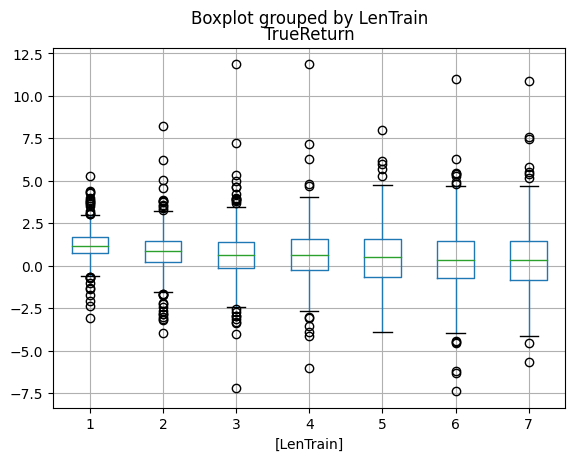

In [ ]:
data.query("Freq == '1w'")[['TrueReturn', 'LenTrain']].boxplot(by='LenTrain', grid=True)

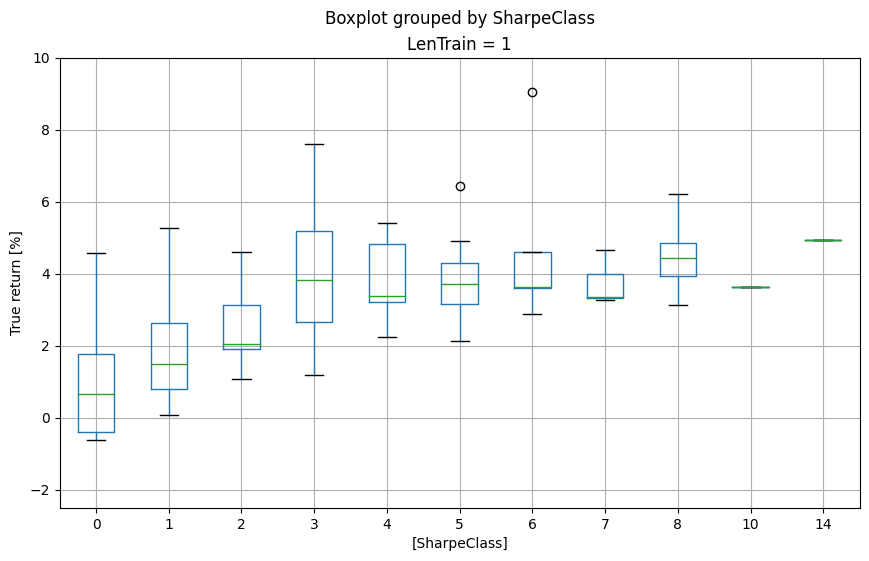

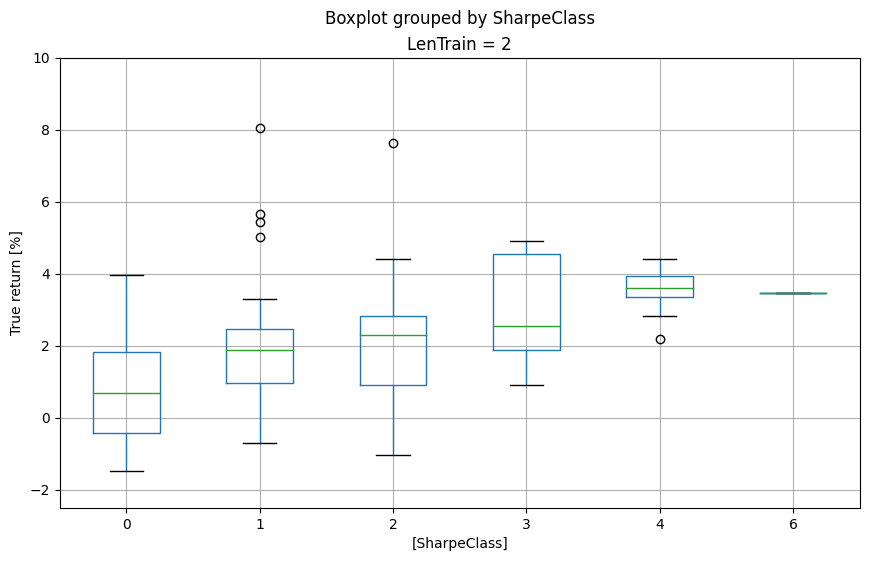

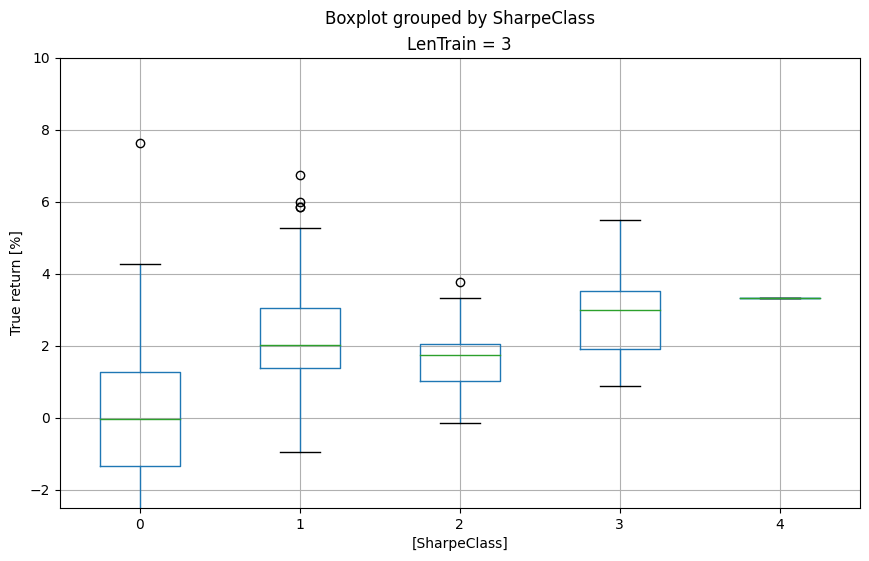

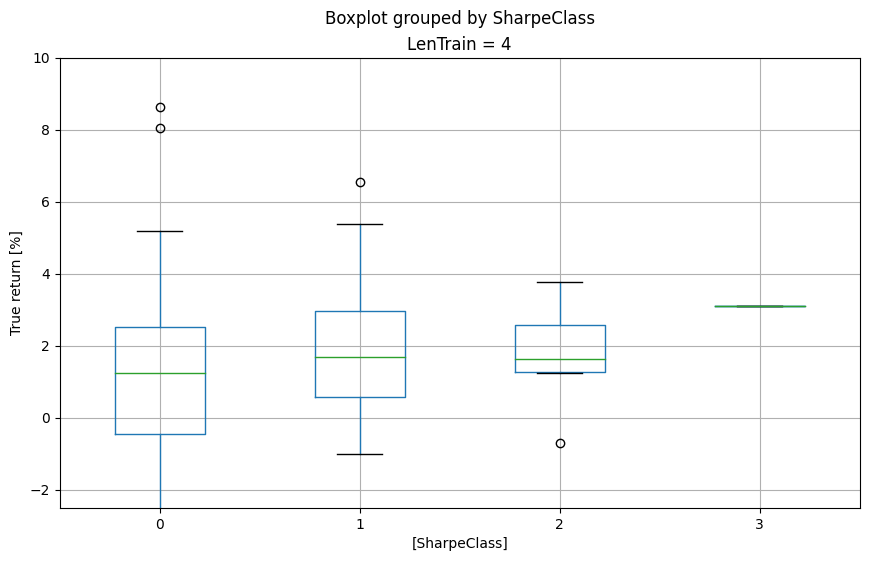

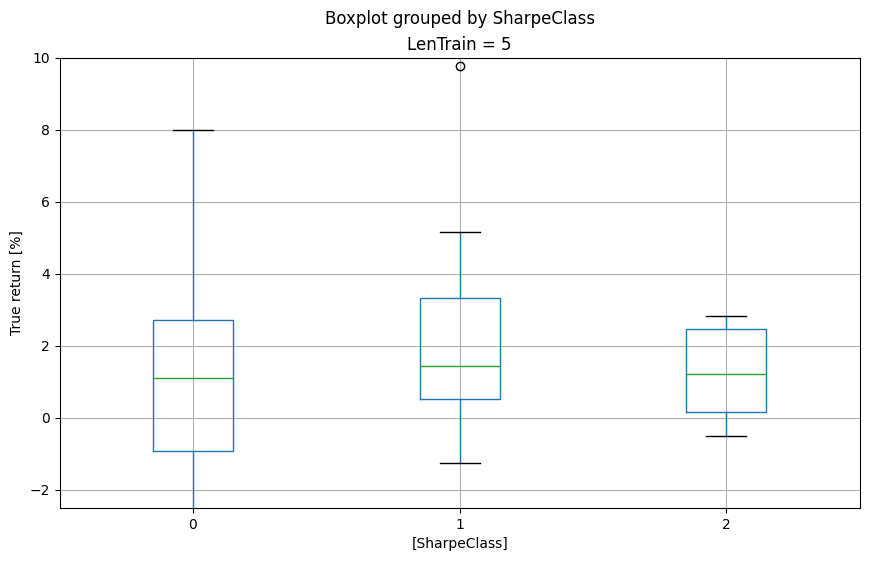

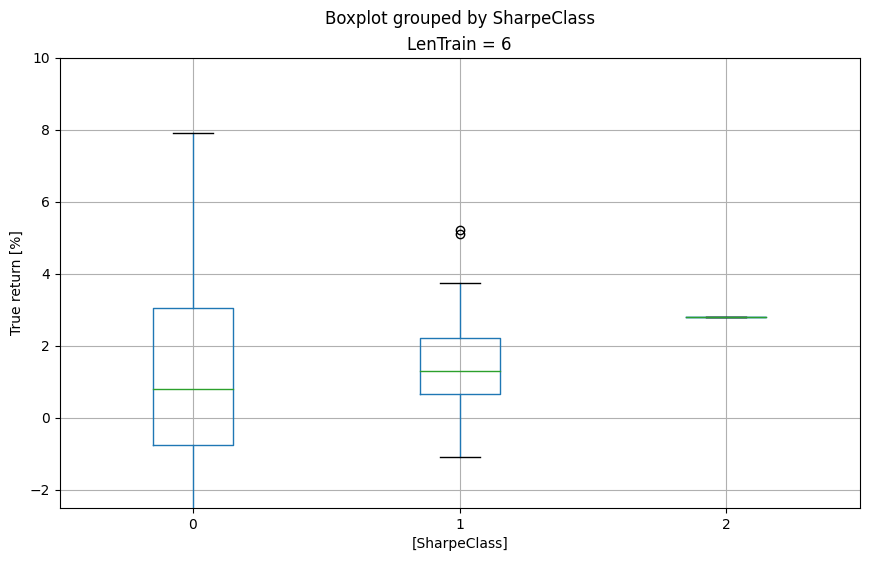

In [ ]:
for i in range(1, 7):
    df = data.query(f"Freq == '1M' and LenTrain == {i}")[['TrueReturn', 'SharpeClass']]
    ax = df.boxplot(by='SharpeClass', figsize=(10, 6), grid=True)
    ax.set_title(f"LenTrain = {i}")
    ax.set_ylim(-2.5, 10)
    ax.set_ylabel('True return [%]')

# Brudnopis

In [134]:
start, end = generate_start_end(shift_date(now(), -3), freq='3M', len_train=2)

print(f"[INFO] Rozpoczynam pracę programu: {now(False)}")
print(f"[INFO] Pracujemy na danych z okresu od {start} do {end}")

dataloader = DataLoader()
data = dataloader.loadInstrumentsData(start_date=start, 
                                      end_date=end, 
                                      filename='InstrumentsData')
info = dataloader.loadInstrumentsInfo()

dl = DataCleaner(data,
                 info, 
                 threshold_spreads=0.05,
                 verbose=False)

data = dl.getPLNPrices()
ask, bid = data['ask'], data['bid']

returnRates = dl.getReturnRates('1D')

[INFO] Rozpoczynam pracę programu: 2025-03-31 17:56:21
[INFO] Pracujemy na danych z okresu od 2024-09-27 do 2025-03-28


In [140]:
alpha_EMA = 0.15
k_long, k_short, k_EMA = 40, 12, 9

Line_long = bid.rolling(k_long).apply(lambda x: EMA(x, alpha_EMA))
Line_short = bid.rolling(k_short).apply(lambda x: EMA(x, alpha_EMA))

Main_line = (Line_short - Line_long).dropna()
Signal_line = Main_line.rolling(k_EMA).apply(lambda x: EMA(x, alpha_EMA))

Diff_line = (Main_line - Signal_line).iloc[-1, :].sort_values(ascending=False)

to_check = Diff_line[Signal_line.iloc[-1, :] > 0.0].index

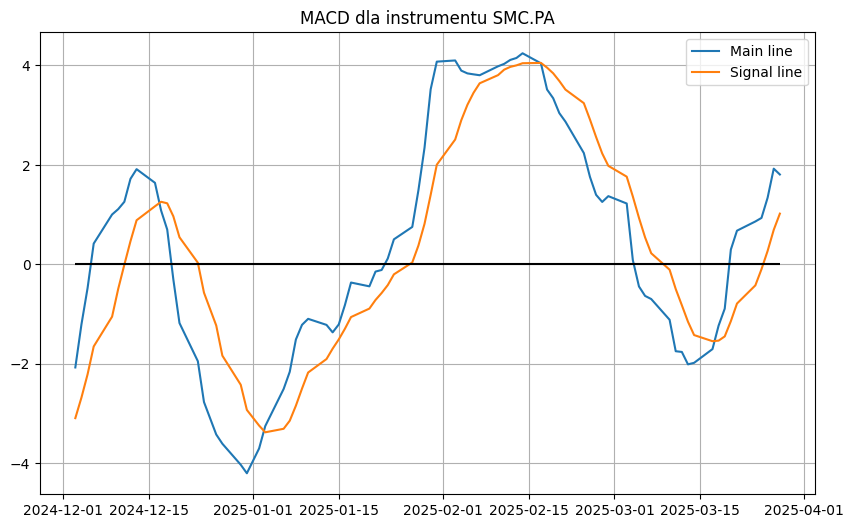

In [147]:
symbol = to_check[6]

Pair = pd.DataFrame([Main_line.loc[:, symbol], Signal_line.loc[:, symbol]]).T.dropna()
x = Pair.index
main = Pair.iloc[:, 0]
signal = Pair.iloc[:, 1]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, main, label='Main line')
ax.plot(x, signal, label='Signal line')
ax.hlines(0, xmin=x[0], xmax=x[-1], colors='black')
ax.grid(True)
ax.legend()
ax.set_title(f'MACD dla instrumentu {symbol}')

plt.show()